In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pygal
from collections import Counter
from matplotlib import pyplot as plt
from IPython.display import SVG, HTML, display

In [2]:
dataset_name = 'validation'

In [3]:
df = pd.read_csv('../data/validation_split.csv')

In [4]:
df.head()

,Unnamed: 0,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,54067,0BO8K084XKYE,ad89aba9bb002,1541457675,1,search for item,1111123,US,"Ledyard, USA",tablet,NaN,NaN,NaN
1,54068,0BO8K084XKYE,ad89aba9bb002,1541458697,2,interaction item image,9979396,US,"Ledyard, USA",tablet,NaN,NaN,NaN
2,54069,0BO8K084XKYE,ad89aba9bb002,1541458697,3,interaction item image,9979396,US,"Ledyard, USA",tablet,NaN,NaN,NaN
3,54070,0BO8K084XKYE,ad89aba9bb002,1541458705,4,clickout item,9979396,US,"Ledyard, USA",tablet,NaN,76028|70388|1336053|317126|79506|9979396|71272...,81|70|104|153|100|86|121|113|113|94|39|94|75|4...
4,54071,0BO8K084XKYE,ad89aba9bb002,1541458805,5,clickout item,9979396,US,"Ledyard, USA",tablet,NaN,76028|70388|1336053|317126|79506|9979396|71272...,81|70|104|153|100|86|121|113|113|94|39|94|75|4...


In [5]:
# only 1/15 of the interactions have filters applied
df.count()

Unnamed: 0         3094195
user_id            3094195
session_id         3094195
timestamp          3094195
step               3094195
action_type        3094195
reference          3094195
platform           3094195
city               3094195
device             3094195
current_filters     223535
impressions         300596
prices              300596
dtype: int64

In [6]:
# number of unique users
unique_user_count = len(df['user_id'].unique())
unique_user_count

156784

In [7]:
# number of unique sessions
unique_session_count = len(df['session_id'].unique())
unique_session_count

174830

In [8]:
clickout_item_action_count = len(df[df['action_type'] == 'clickout item'])
clickout_item_action_count

300596

In [9]:
# sessions per user
sessions_per_user_df = df[['user_id', 'session_id']].drop_duplicates().groupby('user_id').count()

In [10]:
session_count_df = pd.DataFrame.from_dict(Counter(sessions_per_user_df['session_id']), orient='index')
session_count_df = session_count_df.sort_index().rename(columns={0: 'user_count'})
session_count_df.index.name = 'session_count'
session_count_df

,user_count
session_count,
1,141974
2,12364
3,1873
4,427
5,101
6,29
7,11
8,3
10,1


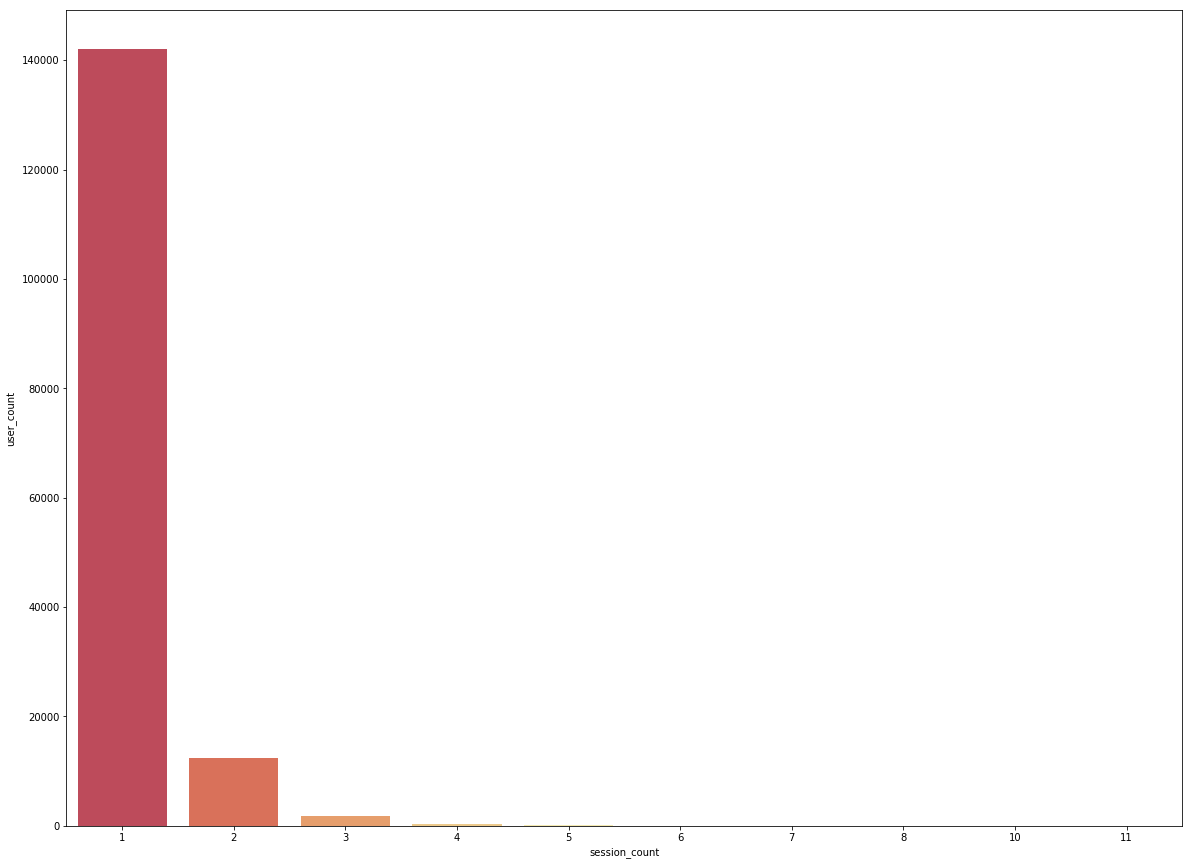

In [12]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='session_count',y='user_count', data=session_count_df.reset_index(), palette='Spectral')

In [13]:
# clickouts per session
df_clickouts_per_session = df[df['action_type'] == 'clickout item']['session_id'].value_counts()
session_ids_with_clickout = set(df_clickouts_per_session.index)

all_unique_session_ids = set(df['session_id'].unique())
session_ids_without_clickout = all_unique_session_ids.difference(session_ids_with_clickout)

print('Number of unique sessions: {}'.format(len(all_unique_session_ids)))
print('Sessions WITH a "clickout item" action: {}'.format(len(session_ids_with_clickout)))
print('Sessions WITHOUT a "clickout item" action: {}'.format(len(session_ids_without_clickout)))
print('Percentage of sessions WITHOUT a "clickout item" action: {}'.format(
    len(session_ids_without_clickout) / len(all_unique_session_ids)
))

Number of unique sessions: 174830
Sessions WITH a "clickout item" action: 157500
Sessions WITHOUT a "clickout item" action: 17330
Percentage of sessions WITHOUT a "clickout item" action: 0.09912486415374935


,number of clickouts in a session,number of sessions
0,1,95996
1,2,31698
2,3,13117
3,4,6596
4,5,3492
5,6,2122
6,7,1347
7,8,872
8,9,586
9,10,376


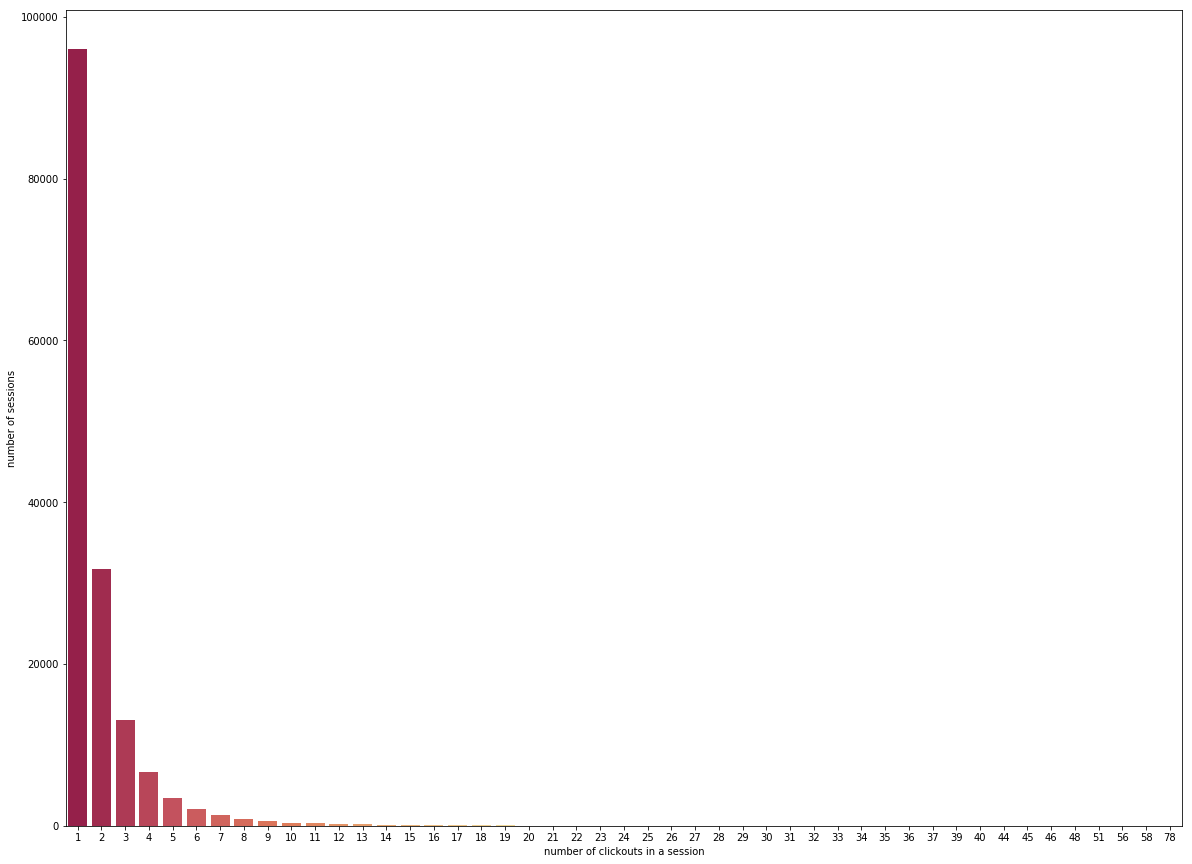

In [14]:
x_label = 'number of clickouts in a session'
y_label = 'number of sessions'

df_clickout_distribution = df_clickouts_per_session.value_counts().reset_index().rename(columns={'index': x_label, 'session_id': y_label})

plt.figure(2, figsize=(20,15))
sns.barplot(
    x=x_label,
    y=y_label,
    data=df_clickout_distribution,
    palette='Spectral'
)

df_clickout_distribution.head(15)

In [15]:
# distrubtion of actions over time
df['timestamp'].describe().apply(lambda time: pd.to_datetime(time, unit='s')).drop(['count', 'std'])

mean   2018-11-06 12:05:32.050051451
min    2018-11-05 22:00:00.000000000
25%    2018-11-06 05:12:30.000000000
50%    2018-11-06 13:23:03.000000000
75%    2018-11-06 18:46:16.000000000
max    2018-11-06 23:59:59.000000000
Name: timestamp, dtype: datetime64[ns]

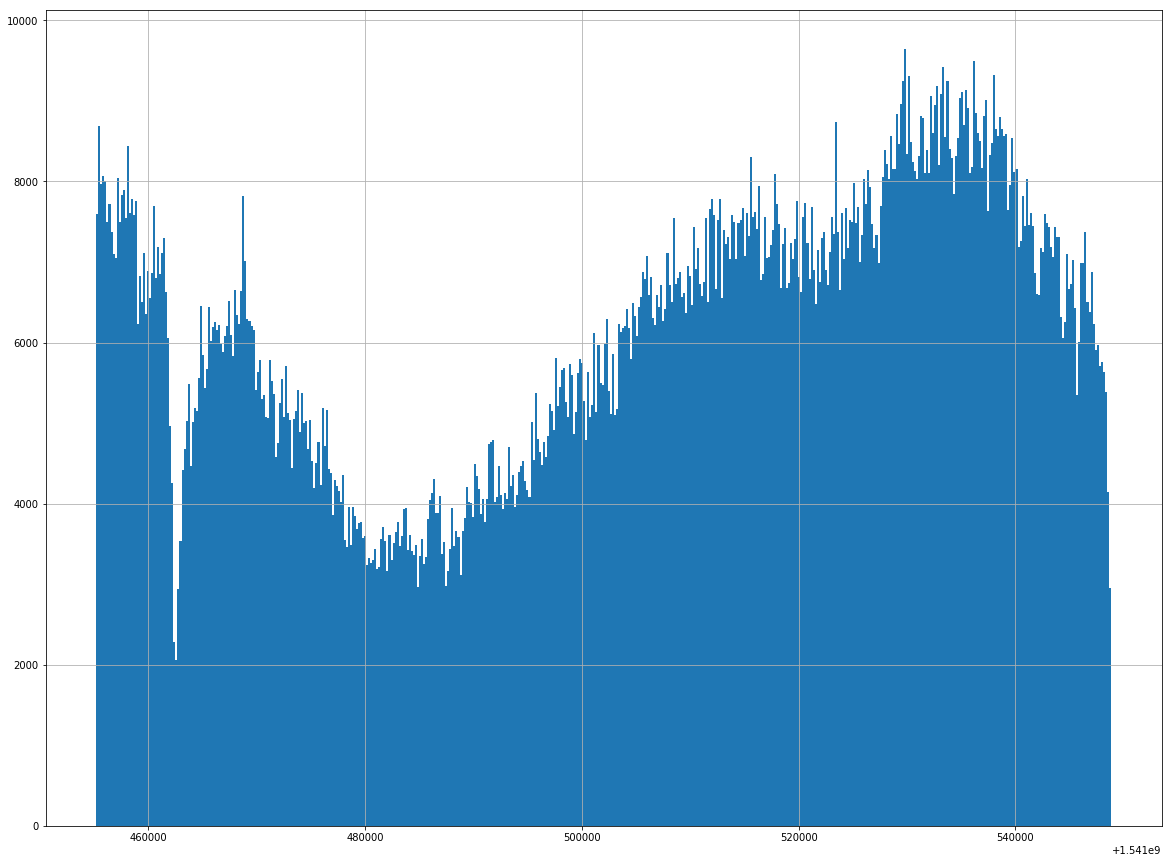

In [16]:
df['timestamp'].hist(bins=500, figsize=(20,15))

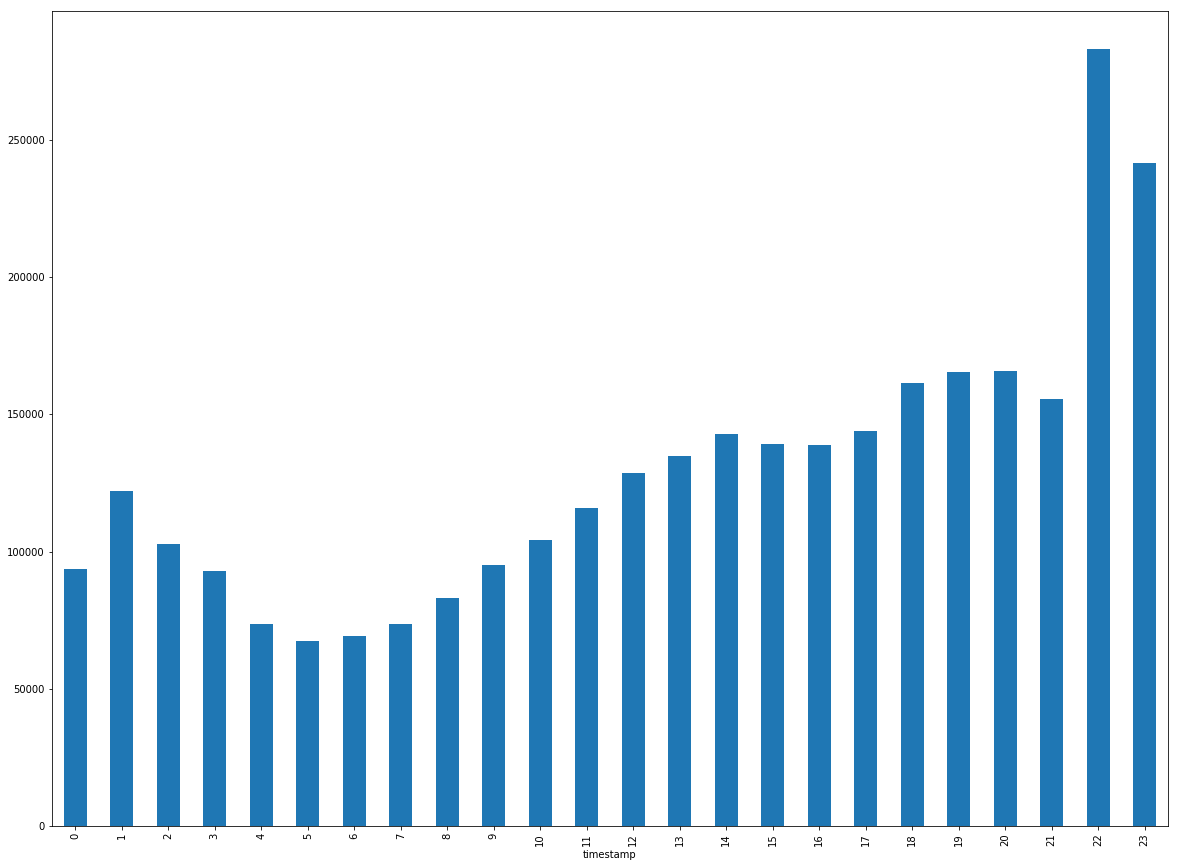

In [17]:
df_date_time = pd.to_datetime(df['timestamp'], unit='s')

# distribution of actions over hour of day
plt.figure(figsize=(20,15))
df_date_time.groupby(df_date_time.dt.hour).count().plot(kind="bar")

In [18]:
action_types_hist = Counter(df['action_type'])

In [19]:
action_types_df = pd.DataFrame.from_dict(action_types_hist, orient='index').reset_index()
action_types_df = action_types_df.rename(columns={'index': 'action_type', 0: 'count'})
action_types_df = action_types_df.sort_values(by=['count'], ascending=False)
action_types_df

,action_type,count
1,interaction item image,2314371
2,clickout item,300596
7,filter selection,136417
4,change of sort order,77747
3,search for destination,76140
8,interaction item info,54813
5,interaction item rating,42844
6,interaction item deals,37575
0,search for item,27920
9,search for poi,25772


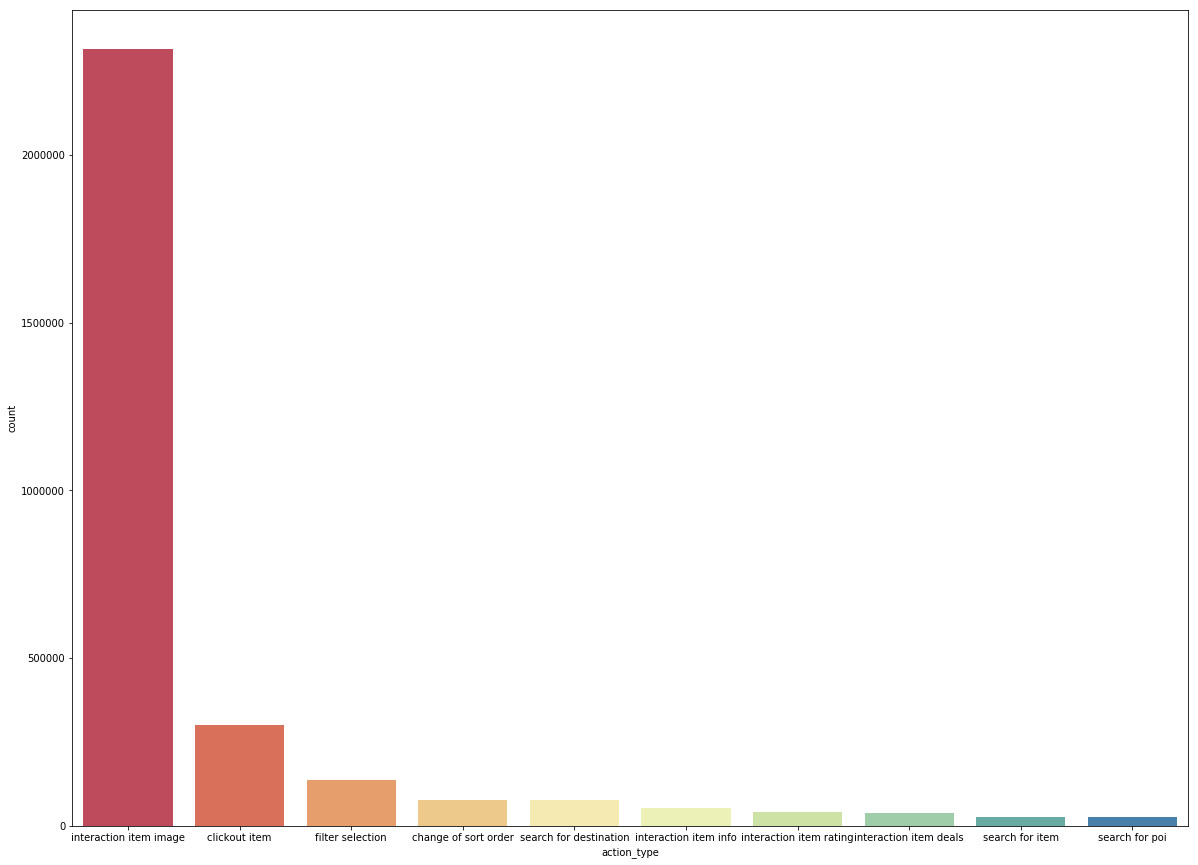

In [20]:
plt.figure(2, figsize=(20,15))
sns.barplot(x='action_type',y='count', data=action_types_df, palette='Spectral')

In [21]:
platform_df = pd.DataFrame.from_dict(Counter(df['platform']), orient='index').reset_index()
platform_df = platform_df.rename(columns={'index': 'country', 0: 'count'})
platform_df = platform_df.sort_values(by='count', ascending=False)
platform_df

,country,count
1,BR,557135
0,US,327816
15,MX,187528
3,UK,176914
14,DE,171995
17,AU,111963
26,IN,111745
31,TR,105839
13,AR,102247
2,IT,101292


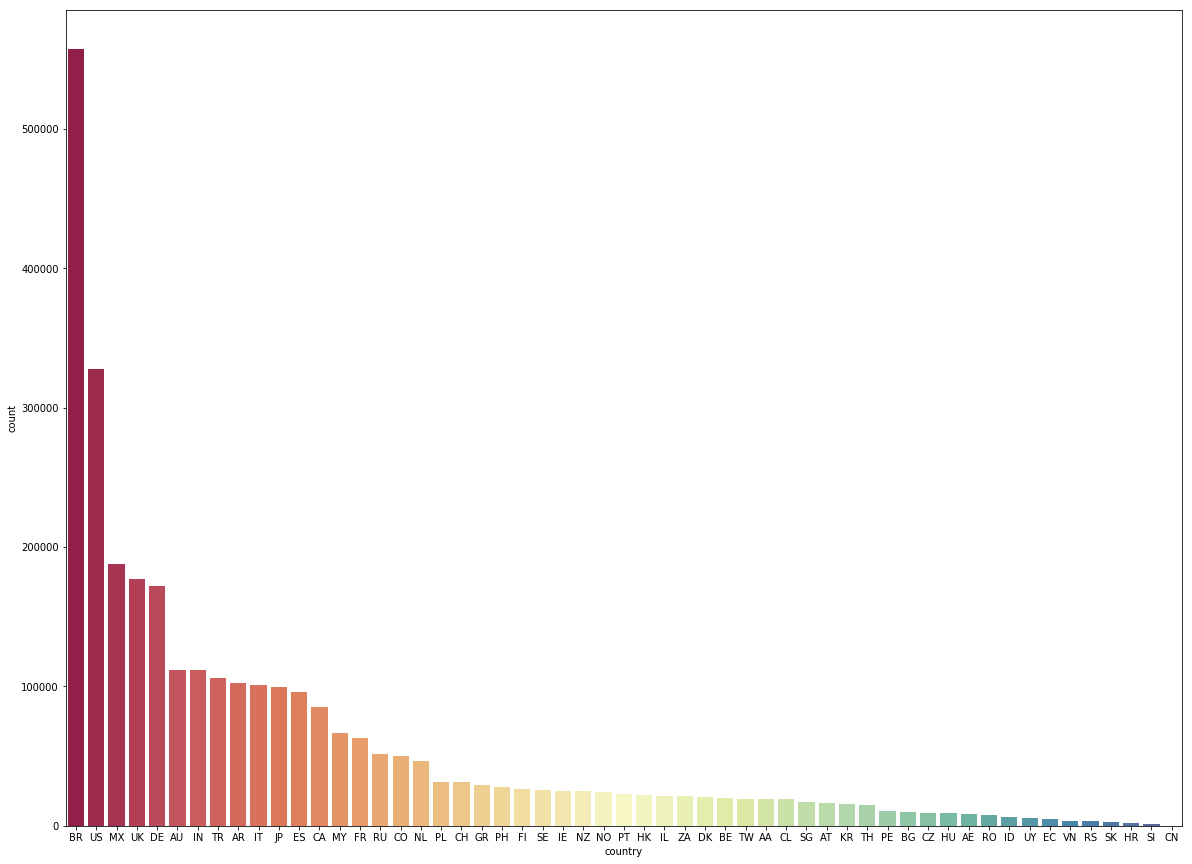

In [22]:
plt.figure(figsize=(20,15))
sns.barplot(x='country',y='count', data=platform_df, palette='Spectral')

In [23]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Actions by Country'
worldmap_chart.add('Country', values=Counter(df['platform'].str.lower()))

worldmap_chart.render_to_file('02-actions_by_country_{}.svg'.format(dataset_name))

# display(SVG(worldmap_chart.render(disable_xml_declaration=True, is_unicode=True)))
# display({'image/svg+xml': worldmap_chart.render()}, raw=True)
# display(SVG(data=worldmap_chart.render()))

In [24]:
Counter(df['device'])

Counter({'tablet': 224801, 'mobile': 1366310, 'desktop': 1503084})

In [25]:
step_df = pd.DataFrame.from_dict(Counter(df['step']), orient='index').reset_index()
step_df = step_df.rename(columns={'index': 'number_of_steps', 0: 'count'})
step_df['cum_sum'] = step_df['count'].cumsum()
step_df['cum_percentage'] = 100 * (step_df['cum_sum'] / step_df['count'].sum())
step_df

,number_of_steps,count,cum_sum,cum_percentage
0,1,173736,173736,5.614901
1,2,136331,310067,10.020926
2,3,111986,422053,13.640155
3,4,94338,516391,16.689026
4,5,82307,598698,19.349071
5,6,73055,671753,21.710106
6,7,66204,737957,23.849725
7,8,60834,798791,25.815794
8,9,56545,855336,27.643248
9,10,53199,908535,29.362564


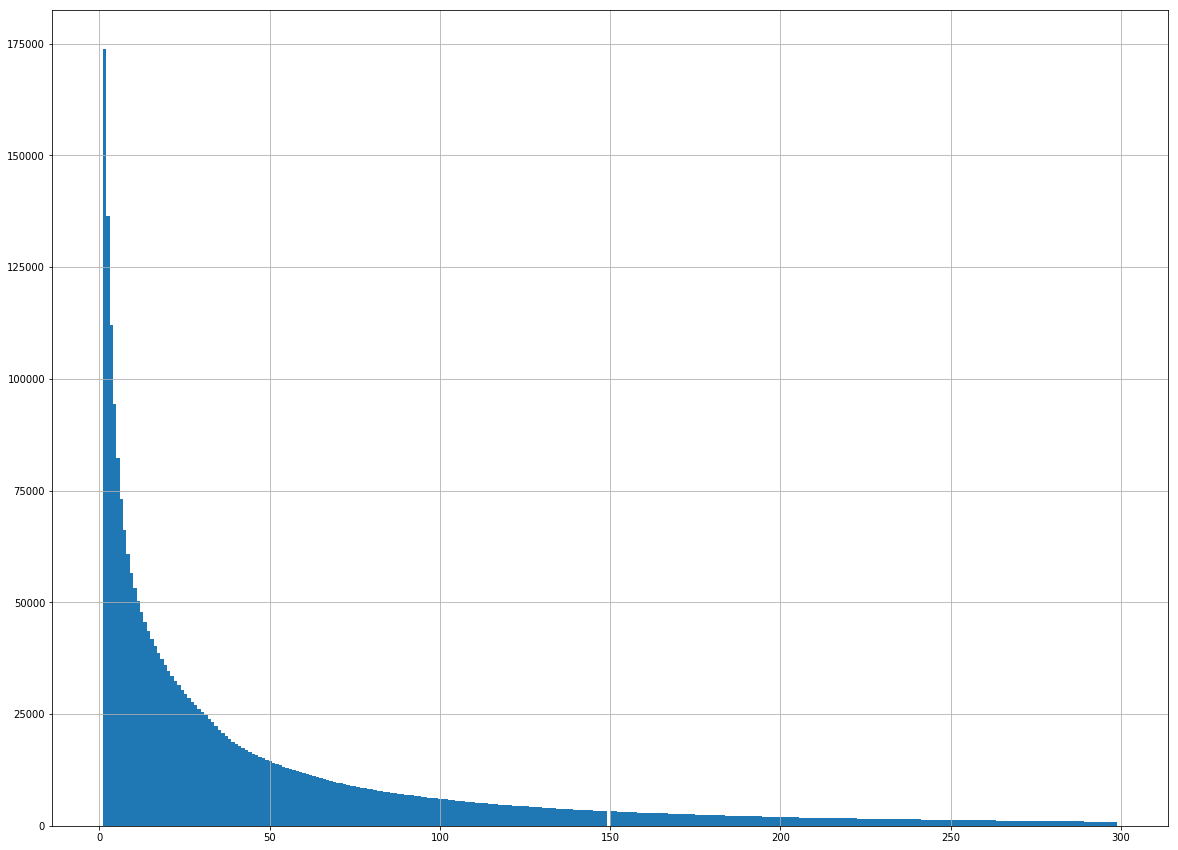

In [26]:
# distribution of number of steps per session

df['step'][df['step'] < 300].hist(bins=300, figsize=(20, 15))

In [27]:
df_filters = df['current_filters'].dropna().apply(lambda x: x.split('|'))
df_filters

46                                           [Sort by Price]
47                                           [Sort by Price]
56                                           [Sort by Price]
77                                           [Sort by Price]
78                                           [Sort by Price]
84                                                   [Cheap]
85                                                   [Cheap]
86                                                   [Cheap]
113                                          [Sort by Price]
135                                          [Sort by Price]
202                        [Sort by Price, Excellent Rating]
203                        [Sort by Price, Very Good Rating]
204                             [Sort by Price, Good Rating]
205        [Sort by Price, Good Rating, 5 Star, 4 Star, 3...
206        [Sort by Price, Good Rating, 5 Star, 4 Star, 3...
207        [Sort by Price, Good Rating, 5 Star, 4 Star, 3...
208        [Sort by Pric

In [28]:
all_filters = np.hstack(df_filters.ravel())

In [29]:
df_unique_filters = pd.DataFrame.from_dict(Counter(all_filters), orient='index').reset_index()
df_unique_filters = df_unique_filters.rename(columns={'index': 'filter', 0: 'count'})
df_unique_filters = df_unique_filters.sort_values(by='count', ascending=False)
df_unique_filters.head(20)

,filter,count
8,Hotel,72669
5,5 Star,57522
10,Resort,55345
6,4 Star,51860
0,Sort by Price,49566
11,Hostal (ES),47409
9,Motel,46121
15,Focus on Distance,37882
7,3 Star,30151
16,Best Value,21542


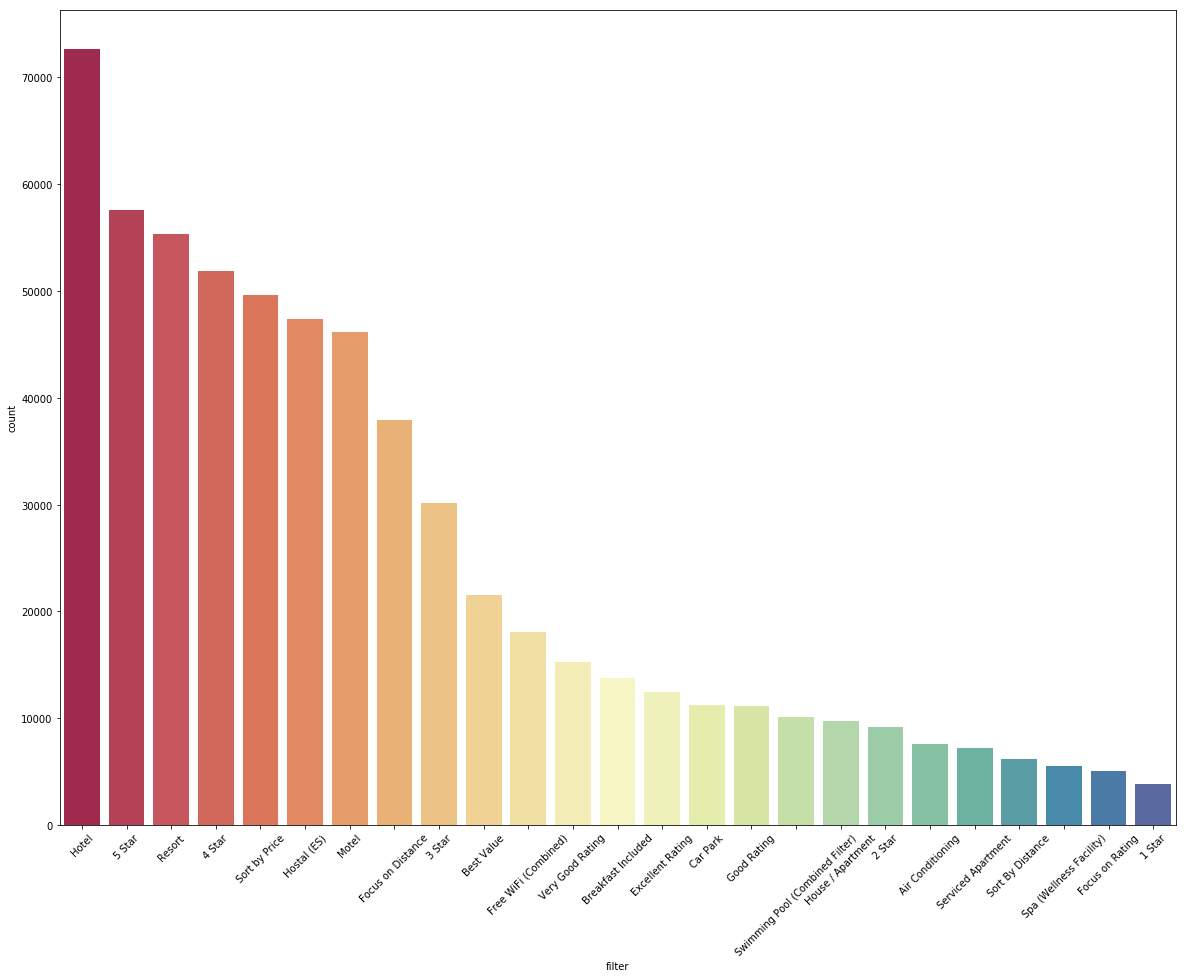

In [30]:
# most used filters by users

plt.figure(figsize=(20,15))
filter_plot = sns.barplot(x='filter',y='count', data=df_unique_filters.head(25), palette='Spectral')
for item in filter_plot.get_xticklabels():
    item.set_rotation(45)